In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Absorvedor dinâmico de vibracoes

## Introdução

Seja o sistema massa-mola-amortecedor unidimensional dado por

$$
m \cdot \ddot{x} + c\cdot \dot{x} + k \cdot x = f \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1) 
$$

Este sistema é subamortecido com frequência natural $\omega_n$ e coeficiente de amortecimento $\xi \in \left[0, \ 1\right)$

$$
\omega_n = \sqrt{\dfrac{k}{m}} \ \ \ \ \ \ \ \ \ \xi = \dfrac{c}{2\sqrt{km}}\ \ \ \ \ \ \ \ \ \ \mu = \sqrt{1-\mu^2}
$$

Agora definimos $2$ funções, $G(\omega)$ e $H(\omega)$ que nos auxiliará posteriormente:

$$
G(\omega) = \dfrac{kx}{f} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
H(\omega) = \dfrac{m\ddot{x}}{f}
$$

## Forçamento harmônico

Vamos primeiramente analisar o sistema sujeito à uma força harmônica

$$
f = f_0 \cdot \exp (i\omega t)
$$

Como queremos encontrar apenas a função $x$, desconsiderando o regime transiente, então obtemos

$$
x = X(\omega) \cdot \exp \left(i\omega t\right)
$$

Que colocando na Equação $(1)$ obtemos

$$
\left[-m\omega^2 + ic \omega + k \right] \cdot X(\omega) \cdot \exp (i\omega t)= f_0 \cdot \exp (i \omega t)
$$
$$
X(\omega) = \dfrac{f_0}{k+ic\omega - m\omega^2}
$$

Neste caso, podemos reescrever as funções $G$ e $H$ de forma:

$$
G(\omega) = \dfrac{k}{k+ic \omega - m\omega^2} = \dfrac{1}{1+2i\xi r-r^2}
$$
$$
H(\omega) = \dfrac{-m\omega^2}{k+ic\omega-m\omega^2} = \dfrac{-r^2}{1+2i\xi r-r^2}
$$

com $r=\omega/\omega_n$.

Vemos que podemos reescrever $X(\omega)$ de modo

$$
X(\omega) = \dfrac{f_0}{k} \cdot G(\omega) = \dfrac{-f_0}{m\omega^2} \cdot H(\omega)
$$

Agora plotamos as funções $G$ e $H$ para diferentes $\xi$ conforme mostra abaixo

In [2]:
rplot = np.linspace(0.01, 3, 1025)
xivals = [0.1, 0.3, 0.6, 0.8]

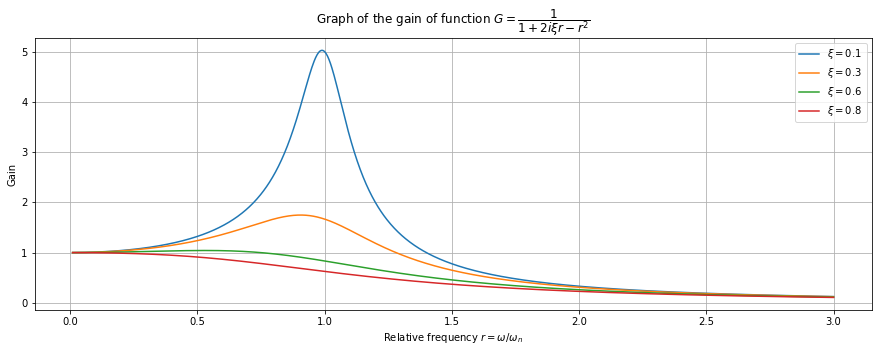

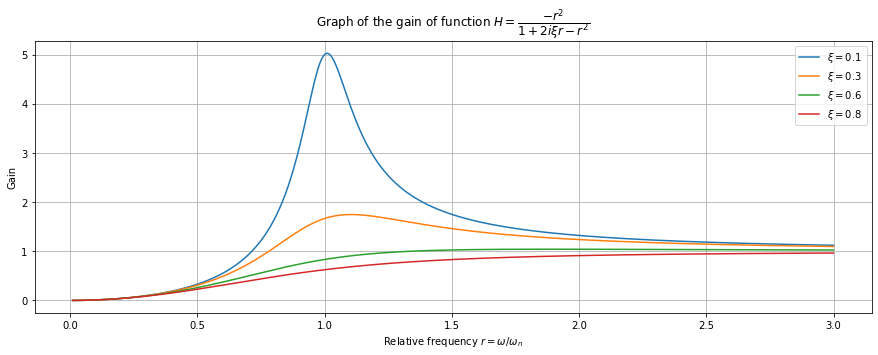

In [3]:
fig1 = plt.figure(figsize=(15, 5))
ax1 = plt.gca()
fig2 = plt.figure(figsize=(15, 5))
ax2 = plt.gca()
for xi in xivals:
    G = 1/(1+2j*xi*rplot-rplot**2)
    H = -rplot**2/(1+2j*xi*rplot-rplot**2)
    ax1.plot(rplot, np.abs(G), label=r"$\xi=%.1f$"%xi)
    ax2.plot(rplot, np.abs(H), label=r"$\xi=%.1f$"%xi)
ax1.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax1.set_ylabel(r"Gain")
ax1.set_title(r"Graph of the gain of function $G = \dfrac{1}{1+2i\xi r-r^2}$")
ax1.legend()
ax1.grid()
ax2.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax2.set_ylabel(r"Gain")
ax2.set_title(r"Graph of the gain of function $H = \dfrac{-r^2}{1+2i\xi r-r^2}$")
ax2.legend()
ax2.grid()


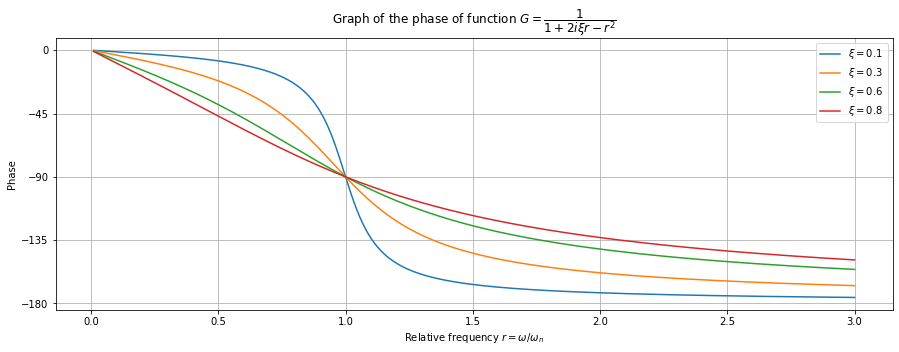

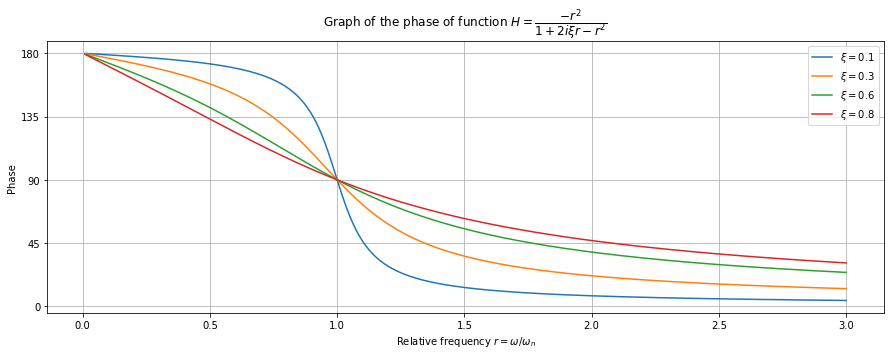

In [4]:
fig1 = plt.figure(figsize=(15, 5))
ax1 = plt.gca()
fig2 = plt.figure(figsize=(15, 5))
ax2 = plt.gca()
for xi in xivals:
    G = 1/(1+2j*xi*rplot-rplot**2)
    H = -rplot**2/(1+2j*xi*rplot-rplot**2)
    ax1.plot(rplot, 180*np.angle(G)/np.pi, label=r"$\xi=%.1f$"%xi)
    ax2.plot(rplot, 180*np.angle(H)/np.pi, label=r"$\xi=%.1f$"%xi)
ax1.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax1.set_ylabel(r"Phase")
ax1.set_title(r"Graph of the phase of function $G = \dfrac{1}{1+2i\xi r-r^2}$")
ax1.set_yticks([0, -45, -90, -135, -180])
ax1.legend()
ax1.grid()
ax2.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax2.set_ylabel(r"Phase")
ax2.set_title(r"Graph of the phase of function $H = \dfrac{-r^2}{1+2i\xi r-r^2}$")
ax2.set_yticks([0, 45, 90, 135, 180])
ax2.legend()
ax2.grid()


## Adição do amortecedor

Agora colocamos os valores anteriores $k$, $c$ e $m$ como $k_1$, $c_1$ e $m_1$.

Então agora vamos analisar o sistema quando adicionamos um outro sistema massa-mola-amortecedor de parâmetros $k_2$, $c_2$ e $m_2$. Temos então o sistema dado por

$$
\underbrace{\begin{bmatrix}
m_1 & \\
& m_2
\end{bmatrix}}_{\left[M\right]} \cdot \underbrace{\begin{bmatrix}
\ddot{x}_1 \\ \ddot{x}_2
\end{bmatrix}}_{\left\{\ddot{x}\right\}} + \underbrace{\begin{bmatrix}
c_1+c_2 & -c_2 \\
-c_2 & c_2
\end{bmatrix}}_{\left[C\right]} \cdot \underbrace{\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}}_{\left\{\dot{x}\right\}} + \underbrace{\begin{bmatrix}
k_1+k_2 & -k_2 \\
-k_2 & k_2
\end{bmatrix}}_{\left[K\right]} \cdot \underbrace{\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}}_{\left\{x\right\}} = \underbrace{\begin{bmatrix}
f_1 \\ f_2
\end{bmatrix}}_{\left\{f\right\}}
$$

$$
\left[M\right] \cdot \{\ddot{x}\} + \left[C\right] \cdot \{\dot{x}\} + \left[K\right] \cdot \{x\} = \{f\}
$$

Supondo que 

$$
\{f\} = \{f_0\} \cdot \exp(i\omega t)
$$

Neste caso

$$
\{x\} = \{X(\omega)\} \cdot \exp (i\omega t)
$$

$$
\underbrace{\left(-\omega^2 [M] + i\omega [C] + [K]\right)}_{[A(\omega)]} \cdot \left\{X(\omega)\right\} \cdot \exp (i\omega t) = \{f_0\} \cdot \exp (i \omega t)
$$

$$
\left\{X(\omega)\right\} = \left[A(\omega)\right]^{-1} \{f_0\}
$$

Fazendo a expansão de $[A(\omega)]$ temos

$$
\left[A(\omega)\right] = \begin{bmatrix}
-\omega^2 m_1 + i\omega (c_1+c_2) + (k_1+k_2) & -i\omega c_2 - k_2 \\
-i\omega c_2 - k_2 & -\omega^2 m_2 +i\omega c_2 + k_2
\end{bmatrix}
$$

Como

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1} =
\dfrac{1}{ad-bc}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

Então

$$
\begin{bmatrix}
X_1 \\ X_2
\end{bmatrix} =
\dfrac{1}{\det [A]} \cdot \begin{bmatrix}
-\omega^2 m_2 +i\omega c_2 + k_2 & i\omega c_2 + k_2 \\
i\omega c_2 + k_2 & -\omega^2 m_1 + i\omega (c_1+c_2) + (k_1+k_2)
\end{bmatrix} \cdot 
\begin{bmatrix}
f_1 \\ f_2
\end{bmatrix}
$$

No caso de $f_2 = 0$ então

$$
X_1 = \dfrac{-\omega^2 m_2 +i\omega c_2 +k_2}{\det [A]} \cdot f_1
$$
$$
X_2 = \dfrac{i\omega c_2 +k_2}{\det [A]} \cdot f_1
$$

Caso a restrição seja de $c_2 = 0$, então $X_1$ assume o valor de zero quando

$$
k_2 - \omega^2 m_2 = 0
$$

Ou seja, a frequência de operação (que queremos anular) é dada por $\omega=\sqrt{k_2/m_2}$.

Mas se for de interesse que $c_2 \ne 0$, as contas ficam mais complexas.
Então uma maneira de reduzir a fração $X_1/f_1$ é descrita por esse [link](https://math.stackexchange.com/questions/4536156/find-omega-to-minimize-x-12-using-matrix) em que o valor de $\omega$ deve satisfazer a equação:

$$
v_1\overline{v_1}a_{11} + 2\Re \left(v_1v_2a_{12}\right) = 0
$$

Com

$$
v_1 = k_2+i\omega c_2-\omega^2m_2
$$
$$
v_2 = k_2-i\omega c_2
$$
$$
a_{11} = 4m_1m_2\omega^2 - 2c_1c_2-4m_1k_2
$$
$$
a_{12} = i\omega m_2c_2 - 2m_2k_2
$$

#### Exemplo numérico

Então, como um exemplo, vamos escolher

$$m_1=1 \ \text{kg}$$
$$c_1=0.3 \ \dfrac{\text{N} \cdot \text{s}}{\text{m}}$$
$$k_1 = 1 \ \text{N}$$

Para o segundo conjunto teremos

$$m_2=0.3 \ \text{kg}$$
$$\xi_2 = 0.1$$
$$\omega_{op} = 1.5 \ \text{rad}/\text{s}$$

de modo que $k_2$ fica livre para encontrarmos. Para achar o valor de $k_2$ vamos usar o método de Newton com o ponto inicial em $k_2 = m_2 \omega_{op}^2$

In [5]:
def f(m1, c1, k1, m2, c2, k2, w):
    v1 = k2 + 1j*w*c2 - m2*w**2
    v1sq = v1*np.conjugate(v1)
    v2 = k2 - 1j*w*c2
    a11 = 4*m1*m2*w**2 -2*c1*c2 -4*m1*k2
    a12 = 1j*w*m2*c2-2*m2*k2
    result = v1sq*a11
    result = sp.expand(result)
    result += v1*v2*a12+np.conjugate(v1*v2*a12)
    result = sp.expand(result)
    return result

def df(m1, c1, k1, m2, c2, k2, w):
    k2s = sp.symbols("k2", real=True, positive=True)
    fs = f(m1, c1, k1, m2, c2, k2s, w)
    dfs = sp.diff(fs, k2s)
    dfs = sp.simplify(dfs)
    return float(dfs.subs(k2s, k2))

def X(M, C, K, w):
    A = K + 1j*w*C - w**2*M
    return np.linalg.solve(A, [1, 0])

In [6]:
m1 = 1
c1 = 0.01
k1 = 1
m2 = 0.3
xi2 = 0.1
wop = 1
k2 = m2*wop**2
for i in range(10):
    c2 = 2*xi2* np.sqrt(m2*k2)
    k2 -= float(f(m1, c1, k1, m2, c2, k2, wop))/df(m1, c1, k1, m2, c2, k2, wop)
    
M = np.array([[m1, 0],
              [0, m2]])
C = np.array([[c1+c2,-c2],
              [-c2, c2]])
K = np.array([[k1+k2, -k2],
              [-k2, k2]])
print("M = ")
print(M)
print("C = ")
print(C)
print("K = ")
print(K)
wn2 = np.sqrt(k2/m2)
print("wn2 = sqrt(k2/m2) = %.4f" % np.sqrt(k2/m2))
print("wop =             = %.4f" % wop)
print("abs(k2-m2*wop**2) = %.4f" % np.abs(k2-m2*wop**2))
print("abs(k2+i*c2*wop-m2*wop^2) = %.4f" % np.abs(k2+1j*wop*c2-m2*wop**2))
print("X1 (wop) = %.4f" % np.abs(X(M, C, K, wop)[0]))
print("X1 (wn2) = %.4f" % np.abs(X(M, C, K, wn2)[0]))
wplot = np.linspace(0.8, 1.2, 1025)
results = np.zeros(wplot.shape, dtype='complex128')
for i, wi in enumerate(wplot):
    results[i] = X(M, C, K, wi)[0]
print("min(X)=", min(np.abs(results)))

M = 
[[1.  0. ]
 [0.  0.3]]
C = 
[[ 0.06838168 -0.05838168]
 [-0.05838168  0.05838168]]
K = 
[[ 1.28403501 -0.28403501]
 [-0.28403501  0.28403501]]
wn2 = sqrt(k2/m2) = 0.9730
wop =             = 1.0000
abs(k2-m2*wop**2) = 0.0160
abs(k2+i*c2*wop-m2*wop^2) = 0.0605
X1 (wop) = 0.6910
X1 (wn2) = 0.6904
min(X)= 0.6831205481334481


In [7]:
wplot = np.linspace(0.5, 2, 129)
X1v = np.zeros(wplot.shape, dtype="complex128")
X2v = np.zeros(wplot.shape, dtype="complex128")
for i, wi in enumerate(wplot):
    A = K + 1j*wi*C - wi**2*M
    Z = np.array([1, 0], dtype="complex128")
    X1v[i], X2v[i] = np.linalg.solve(A, Z)

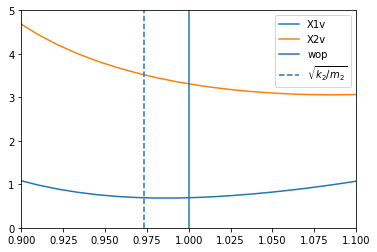

In [8]:
plt.plot(wplot, np.abs(X1v), label="X1v")
plt.plot(wplot, np.abs(X2v), label="X2v")
plt.axvline(x=wop, label="wop")
plt.axvline(x=np.sqrt(k2/m2), ls="dashed", label=r"$\sqrt{k_2/m_2}$")
plt.xlim([0.9, 1.1])
plt.ylim([0, 5])
plt.legend()